In [26]:
import numpy as np
from sparse_shift.utils import dag2cpdag, cpdag2dags
import matplotlib.pyplot as plt
from sparse_shift.plotting import plot_dag
import pandas as pd

In [28]:
df1 = pd.read_csv('../../data/cytometry/dataset_1.csv')
labels = [l.split('.')[1] for l in df1.columns]

In [3]:
dag = np.zeros((11, 11))
dag[2, np.asarray([3, 4])] = 1
dag[4, 3] = 1
dag[8, np.asarray([10, 7, 0, 1, 9])] = 1
dag[7, np.asarray([0, 1, 5, 6, 9, 10])] = 1
dag[0, 1] = 1
dag[1, 5] = 1
dag[5, 6] = 1

true_dag = dag

In [34]:
true_cpdag = dag2cpdag(true_dag)
dags = cpdag2dags(true_cpdag)

In [47]:
# Shape: (graphs, variables, envs, envs)
pvalues = np.load('./results/cytometry_mch_kci_pvalues_env=9.npy')

In [48]:
pvalues.shape

(336, 11, 9, 9)

In [89]:
alpha = 0.05 / pvalues.shape[1]
n_changes = np.sum(pvalues <= alpha, axis=(1, 2, 3)) / 2

In [90]:
np.where((dags == true_dag).all(axis=(1,2)))[0]

array([181])

In [91]:
n_changes[181]

336.0

In [92]:
np.where(n_changes == np.min(n_changes))[0]

array([43])

In [93]:
n_changes[43]

321.0

In [99]:
np.sort(n_changes)
np.where(n_changes == 324)[0]

array([ 48,  54,  79, 110])

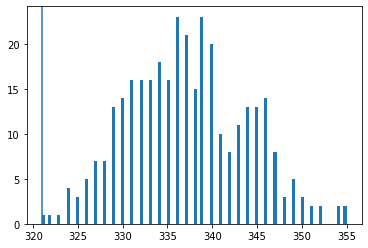

In [54]:
plt.hist(n_changes, bins=100)
plt.axvline(n_changes[43])
plt.show()

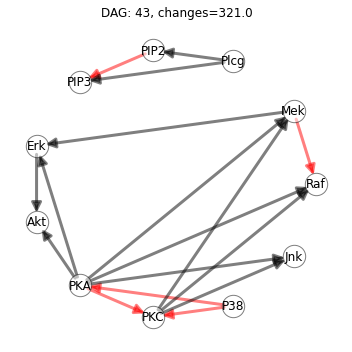

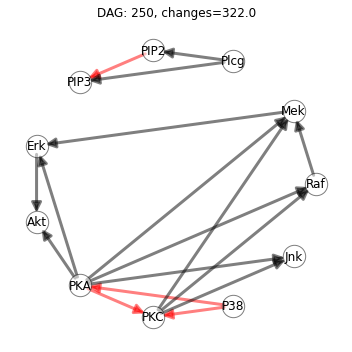

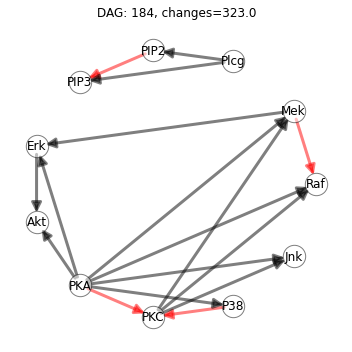

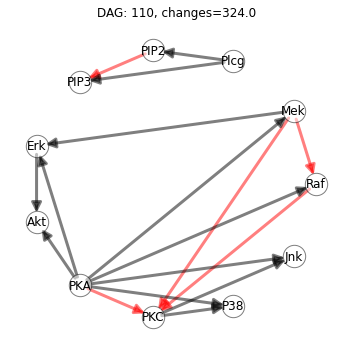

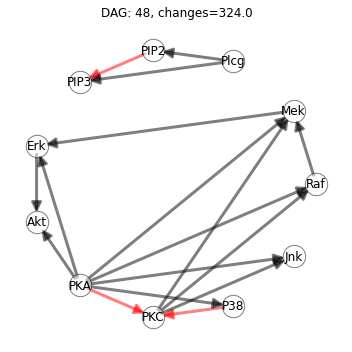

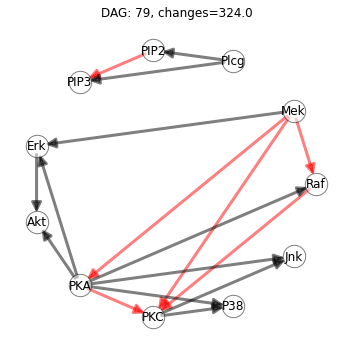

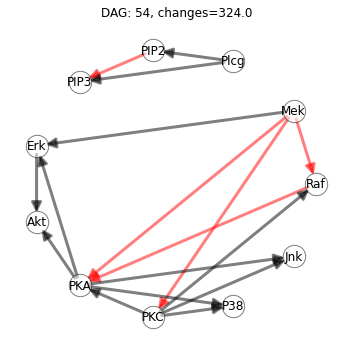

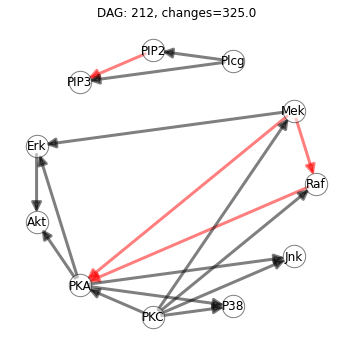

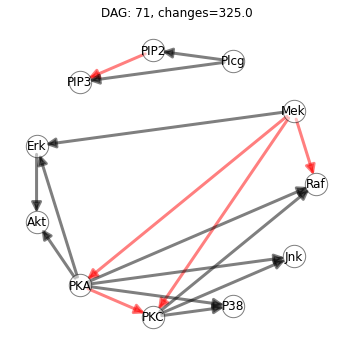

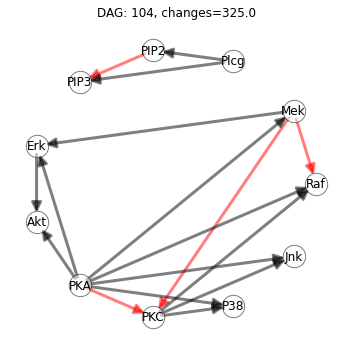

In [103]:
for idx in np.argsort(n_changes)[:10]:
    dag = dags[idx]
    plot_dag(
        dag,
        highlight_edges=dag-true_dag,
        labels=labels,
        title=f'DAG: {idx}, changes={n_changes[idx]}'
    )
    plt.tight_layout()
# plt.savefig('./figures/learned_dag.pdf')

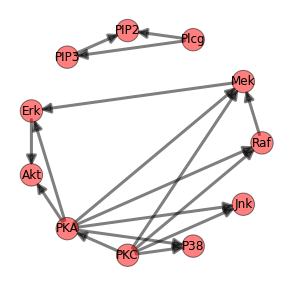

In [86]:
plot_dag(dags[181], labels=labels, highlight_nodes=(pvalues[43, :, 2, 7] < alpha / 11))

In [87]:
pvalues[43, :, 5, 6]

array([1.55431223e-15, 0.00000000e+00, 2.35616798e-20, 2.98103477e-03,
       4.59215649e-02, 8.99280650e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.37169111e-01, 0.00000000e+00])

In [88]:
labels

['Raf',
 'Mek',
 'Plcg',
 'PIP2',
 'PIP3',
 'Erk',
 'Akt',
 'PKA',
 'PKC',
 'P38',
 'Jnk']